In [31]:
# NCG612/NCG603 Python Machine Learning Assignment
# Ian Finnegan - 18145400

# The Packages 
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor as NN
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import pylab as pl
from mpl_toolkits.mplot3d import Axes3D

In [41]:
# The Data
hp = pd.read_csv('hpdemo.csv',dtype=float)

In [48]:
def knnsurf3d(fl_area):
    
    # The Model
    pipe = Pipeline([('zscores',StandardScaler()),('NNreg',NN())])

    # The Scoring Method
    mae = make_scorer(mean_absolute_error, greater_is_better=False)
    
    # The Optimisation Grid (Cross Validation Grid)
    opt_nn = GridSearchCV(
    estimator = pipe,
    scoring = mae,
    param_grid = {
        'NNreg__n_neighbors':range(1,35),
        'NNreg__weights':['uniform','distance'],
        'NNreg__p':[1,2]})  
    opt_nn.fit(hp[['east','north','fl_area']],hp['price']/1000.0)
    
    # The Pridiction Grid
    east_mesh, north_mesh = np.meshgrid(
        np.linspace(505000,555800,100),
        np.linspace(158400,199900,100))
    fl_mesh = np.zeros_like(east_mesh)
    fl_mesh[:,:] = fl_area
    grid_predictor_vars = np.array([east_mesh.ravel(),
        north_mesh.ravel(),fl_mesh.ravel()]).T
    hp_pred = opt_nn.predict(grid_predictor_vars)
    print('Max Predicted House Price', max(hp_pred))
    hp_mesh = hp_pred.reshape(east_mesh.shape)
    
    # The Surface Graph
    fig = pl.figure()
    ax = Axes3D(fig)
    ax.plot_surface(east_mesh, north_mesh, hp_mesh, 
        rstride=1, cstride=1, cmap='YlOrBr',lw=0.01)
    ax.set_xlabel('Easting')
    ax.set_ylabel('Northing')
    ax.set_zlabel('Price at Mean Floor Area')
    pl.show()
    
    return

The aim of the above piece of code is to determine the price, the response variable, of a house given a series of predictor variables, in this case an easting, a northing, and the floor area. This is done by creating a nearest neighbor regression model with the predictor variables, determining the optimal tuning parameters and distance metric for the model, and estimating the accuracy of the model via cross validation with a specific scoring method. The first part of the code is just reading in the data with the pandas package. The main part of the code is the function knnsurf3d, which is comprised of five parts, the first part is the creation of the nearest neighbor regression model within a pipeline, the second part is the creating a scoring method, the third part optimizes the model via cross validation using the scoring method, the fourth part creates a grid of eastings, northings, and a given floor area and predicts values for house prices in each grid square for the area of London, and the final part graphs the surface made by the predicted grid. 

The pipeline contains two blocks, a scaling block, and the nearest neighbor regression model. The scaling process is required since the eastings and northings are in different units to the floor area, thus, without scaling the eastings and northings would dominate over the floor area in terms of their distances. This problem is solved by rescaling all the values to their associated z-scores, since z-scores are comparable regardless of the original units. Min-max rescaling is also a solution but for this case z-scores are used. The scaler function in the pipe is called StandardScaler and the block is named zscores. The model used is the nearest neighbor regression model, this was chosen for two reasons. The first reason being that it’s a supervised learning algorithm, meaning that there are known input variables and output variables, therefore, the algorithm can learn a mapping function from the input to the output. Thus, when there are new input variables the algorithm can predict the output variables. Secondly, when determining a price for a house a common approach is to look at the prices of similar sized houses nearby, similar to how the nearest neighbor process works. The model function in the pipe is called NN and its block is named NNreg. The blocks in the pipeline both contain fit methods, with the scaler block also having a transform method, and the nearest neighbor block having a predict method. The pipeline works by taking in the original data via its own fit method which comes from the first block, transforming the data, passing it on to the fit method of the next block, and finally producing the prediction.  

As stated above the idea of supervised learning is to determine an appropriate function by which output variables can be predicted by given some input variables. To determine how accurate a specific function, the function is first calibrated with a training set of the overall data with a given set of tuning parameters. The using the remaining data, the test set, predictions for output variables are determined. The predicted outputs are then compared against the actual outputs and an error score is calculated to determine how accurate the model is. This score can be calculated using a plethora of methods including, root mean square error (RMSE), mean error (ME), root median square error (RMedSE), or the one used in this code, the mean absolute error (MAE). For all of the error methods just stated, smaller values imply better prediction performance. 

The tuning parameters mentioned previously can just be guessed, however it's better to optimize them in a more appropriate manner. To start, the tuning parameters required must be determined. Since the nearest neighbor method is being used the parameters are the number of nearest neighbors to be considered, how the mean should be weighted, and which distance metric is best. To cycle through all possible parameters and determine which is the most optimal, a cross validation grid is made. This is done using the GridSearchCV function, which takes in the arguments of the algorithm being used, the scoring method being used, and finally a set of tuning parameters to iterate through. The first two arguments are NN(), and MAE respectively. The final set of arguments are the grid, made up of number of nearest neighbors ranging from 1 to 35, whether the mean weighting should be uniform or distance based, and finally whether the distance metric should be Euclidean or city block. Each combination of these parameter is tested and the one with the lowest MAE is returned and stored in opt_nn. These parameters turn out to be 13, distance based, and city block respectively, with a MAE of 26.47.  

Now that the function has been optimized and can predict housing prices, the predicted values can be graphically shown as a 3d surface. The prediction grid is made with eastings and northings that cover the area of London. An empty grid of the same shape as the eastings grid is made and each square filled with the value of floor area that’s inputted into knnsurf3d. The grids are then unraveled to 1d arrays and fed into the opt.nn prediction model, this is then reshaped back to grid format with each square now having a predicted house price for that particular easting and northing at that floor area. This surface can then be plotted to produce a graphical representation of the house prices at those coordinates for the given floor area.  

/Users/Ianfinnegan/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Max Predicted House Price 221.56666860032234


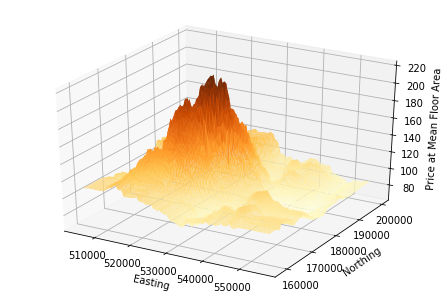

/Users/Ianfinnegan/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Max Predicted House Price 210.80449382405155


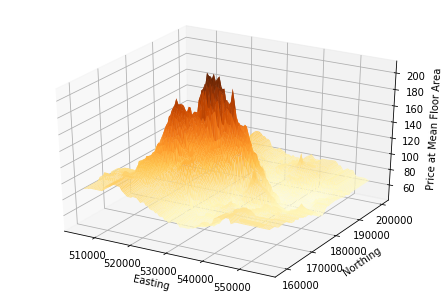

/Users/Ianfinnegan/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Max Predicted House Price 291.8045247929889


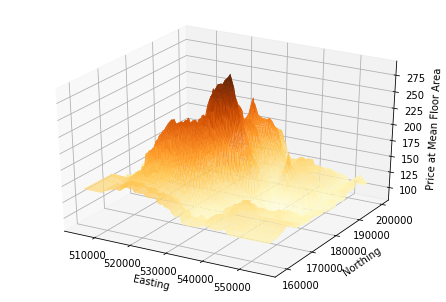

In [49]:
knnsurf3d(np.mean(hp['fl_area']))
knnsurf3d(75)
knnsurf3d(125)

The above 3d plots show the graphical output for the predicted values of house prices at those eastings and northings for the floor areas of 92.88 (the mean floor area), 75, 125 square meters. These graphs show maximum predicted house prices of approximately 222, 211, and 292 thousand pounds respectively at approximate eastings and northings 520000 and 190000 respectively. The predicted house prices then decrease the further from these approximate eastings and northings the coordinates are. Since all points on each of the above graphs are for their respective floor areas, they only other component of the price is the house location. Thus the spikiness of the surface is due to price difference for different locations.  